#Prediction of Detail-views numbers (Regression)

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
import warnings
warnings.filterwarnings("ignore")

In [42]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Interview_Assignments/autoScout24/processed_data.csv')
data.head()

,product_tier,price,search_views,detail_views,stock_days,ctr,zip_code_2,zip_code_3,zip_code_4,zip_code_5,zip_code_6,zip_code_7,zip_code_8,zip_code_9,Volkswagen,Renault,Peugeot,Opel,Ford,Mercedes-Benz,BMW,Volvo,Toyota,Audi,article_age
0,0,0.067030,3091.0,123.0,30,0.037803,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.0
1,0,0.143864,3283.0,223.0,52,0.067926,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3.0
2,0,0.047821,3247.0,265.0,51,0.081614,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,20.0
3,0,0.007003,1856.0,26.0,101,0.014009,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,15.0
4,0,0.106048,490.0,20.0,12,0.040816,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4.0


**Splitting Data into Dependent and Independent Features**

In [43]:
X = data.loc[:, data.columns != 'detail_views']
y = data['detail_views']

#Features Selection

In [44]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

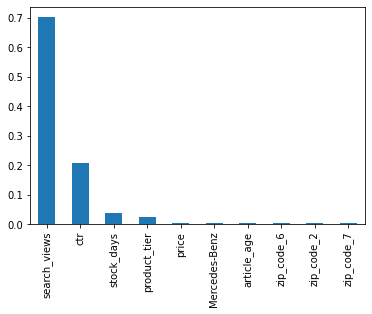

In [45]:
important_features = pd.Series(model.feature_importances_, index=X.columns)
important_features.nlargest(10).plot(kind='bar')
plt.show()

**Choosing top 6 features only**

In [46]:
X = X[['search_views', 'ctr', 'price', 'stock_days', 'article_age', 'product_tier']]

**Train Test Split**

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

**Fitting Linear Regression Model**

In [48]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
from sklearn import metrics

linear_predictions = linear_regressor.predict(X_test)

print("-----------Linear Regression Scores------------")
print('R_2:', metrics.r2_score(y_test, linear_predictions))
print('MAE:', metrics.mean_absolute_error(y_test, linear_predictions))
print('MSE:', metrics.mean_squared_error(y_test, linear_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, linear_predictions)))

-----------Linear Regression Scores------------
R_2: 0.728353315070037
MAE: 38.9690001676137
MSE: 13581.739649225807
RMSE: 116.5407209915307


In [50]:
coeff_df = pd.DataFrame(linear_regressor.coef_, X.columns, columns=['Co-efficients'])
coeff_df

,Co-efficients
search_views,0.031284
ctr,1270.930145
price,117.448647
stock_days,0.522183
article_age,1.430008
product_tier,-8.005500


In [51]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [52]:
ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train, y_train)

ridge_predictions = ridge_regressor.predict(X_test)

from sklearn import metrics
print("-----------Ridge Regression Score------------")
print('R_2:', metrics.r2_score(y_test, ridge_predictions))
print('MAE:', metrics.mean_absolute_error(y_test, ridge_predictions))
print('MSE:', metrics.mean_squared_error(y_test, ridge_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ridge_predictions)))

-----------Ridge Regression Score------------
R_2: 0.7283533150700262
MAE: 38.96900016761337
MSE: 13581.739649226341
RMSE: 116.54072099153301


In [61]:
# Lasso
lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

lasso_predictions = lasso_regressor.predict(X_test)

from sklearn import metrics
print("-----------Lasso Regression Scores------------")
print('R_2:', metrics.r2_score(y_test, lasso_predictions))
print('MAE:', metrics.mean_absolute_error(y_test, lasso_predictions))
print('MSE:', metrics.mean_squared_error(y_test, lasso_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lasso_predictions)))

-----------Lasso Regression Scores------------
R_2: 0.728342020137509
MAE: 38.87589118092883
MSE: 13582.304371129141
RMSE: 116.54314381862685
